In [1]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on 20181217

@author: zhangji
"""

%pylab inline
pylab.rcParams['figure.figsize'] = (25, 11)
fontsize = 40

import os
import glob
import numpy as np
import scipy as sp
import scipy.misc
import pandas as pd
import re
from scanf import scanf
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d
from sympy import symbols, simplify, series, exp
from sympy.matrices import Matrix
from sympy.solvers import solve
from scipy.optimize import leastsq, curve_fit
from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
from IPython.display import display, HTML
from scipy import interpolate
# import support_fun as spf
from matplotlib import animation, rc
from tqdm import tqdm_notebook as tqdm
import natsort 
from shutil import copyfile

rc('animation', html='html5')
PWD = os.getcwd()
font = {'size': 20}
matplotlib.rc('font', **font)
np.set_printoptions(linewidth=90, precision=5)

Populating the interactive namespace from numpy and matplotlib


In [38]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    limits = np.array([
        ax.get_xlim3d(),
        ax.get_ylim3d(),
        ax.get_zlim3d(),
    ])

    origin = np.mean(limits, axis=1)
    radius = 0.5 * np.max(np.abs(limits[:, 1] - limits[:, 0]))
    ax.set_xlim3d([origin[0] - radius, origin[0] + radius])
    ax.set_ylim3d([origin[1] - radius, origin[1] + radius])
    ax.set_zlim3d([origin[2] - radius, origin[2] + radius])
    
def update_lines(num, ecoli_nodes_list, line_list):
    for line in line_list:
        line.set_data([], [])
        line.set_3d_properties([])
    line = line_list[num]
    ecoli_nodes = ecoli_nodes_list[num]
    line.set_data(ecoli_nodes[:, 0:2].T)
    line.set_3d_properties(ecoli_nodes[:, 2])
    return line

def save_motion_ecoli_mp4(dir_name, file_handle, fig=None, ax=None):
    print(dir_name, file_handle)
    t_dir = os.path.join(PWD, dir_name + file_handle)
    mat_names = glob.glob('%s/%s_*.mat' % (t_dir, file_handle))
    
    if fig is None:
        fig = plt.figure(figsize=(20, 15))
        fig.patch.set_facecolor('white')
        ax = axes3d.Axes3D(fig)
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=25, bitrate=1800, metadata=dict(artist='ZhangJi', title=file_handle, copyright='MIT'))

    line_list = []
    ecoli_U_list = []
    ecoli_norm_list = []
    ecoli_center_list = []
    ecoli_nodes_list = []
    ecoli_u_list = []
    ecoli_f_list = []
    mat_names = natsort.natsorted(mat_names)
#     mat_names = mat_names[:10] + mat_names[-10:]
    for mati in mat_names:
        mat_contents = loadmat(mati)
        ecoli_U = mat_contents['ecoli_U'].flatten()
        ecoli_norm = mat_contents['ecoli_norm'].flatten()
        ecoli_center = mat_contents['ecoli_center'].flatten()
        ecoli_nodes = mat_contents['ecoli_nodes']
        ecoli_u = mat_contents['ecoli_u']
        ecoli_f = mat_contents['ecoli_f']
    #     ax.quiver(ecoli_nodes[:, 0], ecoli_nodes[:, 1], ecoli_nodes[:, 2], ecoli_f[:, 0], ecoli_f[:, 1], ecoli_f[:, 2])
        tmp_line = ax.plot(ecoli_nodes[:, 0], ecoli_nodes[:, 1], ecoli_nodes[:, 2], '-b')
        line_list.append(tmp_line[0])
        ecoli_U_list.append(ecoli_U)
        ecoli_norm_list.append(ecoli_norm)
        ecoli_center_list.append(ecoli_center)
        ecoli_nodes_list.append(ecoli_nodes)
    #     ecoli_u_list.append(ecoli_u)
    #     ecoli_f_list.append(ecoli_f)
    #     set_axes_equal(ax)

    ecoli_U_list = np.vstack(ecoli_U_list)
    ecoli_norm_list = np.vstack(ecoli_norm_list)
    ecoli_center_list = np.vstack(ecoli_center_list)
    ax.set_xlim3d([-5, 15])
    ax.set_xlabel('X')
    ax.set_ylim3d([-10, 10])
    ax.set_ylabel('Y')
    ax.set_zlim3d([-10, 10])
    ax.set_zlabel('Z')
    ax.set_title(file_handle)

    line_ani = animation.FuncAnimation(fig, update_lines, len(line_list), fargs=(ecoli_nodes_list, line_list, ),
                                       interval=200, blit=False)
    line_ani.save(os.path.join(PWD, dir_name, file_handle + '.mp4'), writer=writer)
#     line_ani

In [ ]:
fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor('white')
ax = axes3d.Axes3D(fig)
# for dir_name in ['motion_ecoli_torque1/', 'motion_ecoli_torque2/', 'motion_ecoli_torque3/', 'motion_ecoli_torque4/', ]: 
#     for file_handle in ['dbg_tau00.00', 'dbg_tau00.10', 'dbg_tau00.20', 'dbg_tau00.33', 'dbg_tau00.50', 'dbg_tau01.00', 'dbg_tau02.00']:
#         save_motion_ecoli_mp4(dir_name, file_handle, fig, ax)
#         plt.cla()
# print()

# dir_name = 'motion_ecoli_torque3/'
# file_handle = 'dbg_tau10.00'
# save_motion_ecoli_mp4(dir_name, file_handle)
# plt.cla()

# dir_name = 'motion_ecoli_torque4/'
# file_handle = 'dbg_tau10.00'
# save_motion_ecoli_mp4(dir_name, file_handle)
# plt.cla()

# dir_name = 'motion_ecoli_torque5/'
# for file_handle in ['dbg_tau00.00', 'dbg_tau00.10', 'dbg_tau00.20', 'dbg_tau00.33', 'dbg_tau00.50',
#                     'dbg_tau01.00', 'dbg_tau02.00', 'dbg_tau10.00']:
#     save_motion_ecoli_mp4(dir_name, file_handle, fig, ax)
#     plt.cla()
    
dir_name = 'motion_ecoli_torque6/'
for file_handle in ['dbg_tau00.00', 'dbg_tau00.10', 'dbg_tau00.20', 'dbg_tau00.33', 'dbg_tau00.50',
                    'dbg_tau01.00', 'dbg_tau02.00', 'dbg_tau10.00']:
    save_motion_ecoli_mp4(dir_name, file_handle, fig, ax)
    plt.cla()
    


motion_ecoli_torque6/ dbg_tau00.00


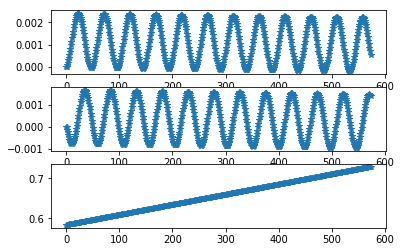

In [4]:
fig, [ax0, ax1, ax2] = plt.subplots(nrows=3, ncols=1)
fig.patch.set_facecolor('white')
ax0.plot(ecoli_center_list[:, 0], '-*')
ax1.plot(ecoli_center_list[:, 1], '-*')
ax2.plot(ecoli_center_list[:, 2], '-*')


In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.animation import FuncAnimation
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

num_frames = 50
theta = np.linspace(0,2*np.pi, 10, endpoint=False)
r = np.arange(1,2.1)
z = np.arange(-2,2.1,1)


def compute_segs(i):
    offset = 2*i*np.pi/num_frames
    theta2,r2, z2 = np.meshgrid(theta+offset,r,z)

    x = r2*np.cos(theta2)
    y = r2*np.sin(theta2)

    u = x+0.2*np.cos(4*theta2)
    v = y
    w = z2+0.2*np.sign(z2)*np.sin(4*theta2)

    return x,y,z2,u,v,w


segs = compute_segs(0)
cols = ['b' for x in segs[0].ravel()]
cols[0] = 'r'
quivers = ax.quiver(*segs, length=0.1, colors = cols, normalize=True)


ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
ax.set_zlim([-3,3])
def animate(i):

    segs = np.array(compute_segs(i)).reshape(6,-1)

    new_segs = [[[x,y,z],[u,v,w]] for x,y,z,u,v,w in zip(*segs.tolist())]
    quivers.set_segments(new_segs)
    return quivers


ani = FuncAnimation(fig, animate, frames = num_frames, interval = 30, blit=False)
ani